# iPRules

# Statics

In [11]:
import dask.dataframe as dd
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics


## Load Dataset

In [12]:

from notebooks.IPRules.read_datasets import read_dataset

name = "credit"

path = f'../..'
dataset_path_name = f'{path}/data/{name}.csv'
X, y, dataset, target_value_name, pandas_dataset = read_dataset(name, dataset_path_name)

pandas_dataset.head()

,LIMIT_BAL_L_High,LIMIT_BAL_L_Low,LIMIT_BAL_L_Medium,LIMIT_BAL_L_VeryHigh,LIMIT_BAL_L_VeryLow,LIMIT_BAL_R_Low,LIMIT_BAL_R_Medium,LIMIT_BAL_R_VeryHigh,LIMIT_BAL_R_VeryLow,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_L_High,AGE_L_Low,AGE_L_Medium,AGE_L_VeryHigh,AGE_L_VeryLow,AGE_R_High,AGE_R_Low,AGE_R_Medium,AGE_R_VeryHigh,AGE_R_VeryLow,PAY_0__2,PAY_0__1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2__2,PAY_2__1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3__2,PAY_3__1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4__2,PAY_4__1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5__2,PAY_5__1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6__2,PAY_6__1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,BILL_AMT1_L_High,BILL_AMT1_L_Low,BILL_AMT1_L_Medium,BILL_AMT1_L_VeryHigh,BILL_AMT1_L_VeryLow,BILL_AMT1_R_High,BILL_AMT1_R_Low,BILL_AMT1_R_Medium,BILL_AMT1_R_VeryHigh,BILL_AMT1_R_VeryLow,BILL_AMT2_L_High,BILL_AMT2_L_Low,BILL_AMT2_L_Medium,BILL_AMT2_L_VeryHigh,BILL_AMT2_L_VeryLow,BILL_AMT2_R_Low,BILL_AMT2_R_Medium,BILL_AMT2_R_VeryHigh,BILL_AMT2_R_VeryLow,BILL_AMT3_L_High,BILL_AMT3_L_Low,BILL_AMT3_L_Medium,BILL_AMT3_L_VeryHigh,BILL_AMT3_L_VeryLow,BILL_AMT3_R_VeryHigh,BILL_AMT3_R_VeryLow,BILL_AMT4_L_High,BILL_AMT4_L_Low,BILL_AMT4_L_Medium,BILL_AMT4_L_VeryHigh,BILL_AMT4_L_VeryLow,BILL_AMT4_R_High,BILL_AMT4_R_Low,BILL_AMT4_R_Medium,BILL_AMT4_R_VeryHigh,BILL_AMT4_R_VeryLow,BILL_AMT5_L_High,BILL_AMT5_L_Low,BILL_AMT5_L_Medium,BILL_AMT5_L_VeryHigh,BILL_AMT5_L_VeryLow,BILL_AMT5_R_High,BILL_AMT5_R_Low,BILL_AMT5_R_VeryHigh,BILL_AMT5_R_VeryLow,BILL_AMT6_L_High,BILL_AMT6_L_Low,BILL_AMT6_L_Medium,BILL_AMT6_L_VeryHigh,BILL_AMT6_L_VeryLow,BILL_AMT6_R_Low,BILL_AMT6_R_Medium,BILL_AMT6_R_VeryHigh,BILL_AMT6_R_VeryLow,PAY_AMT1_L_High,PAY_AMT1_L_Low,PAY_AMT1_L_Medium,PAY_AMT1_L_VeryHigh,PAY_AMT1_L_VeryLow,PAY_AMT1_R_VeryHigh,PAY_AMT1_R_VeryLow,PAY_AMT2_L_High,PAY_AMT2_L_Low,PAY_AMT2_L_Medium,PAY_AMT2_L_VeryLow,PAY_AMT2_R_Low,PAY_AMT2_R_Medium,PAY_AMT2_R_VeryHigh,PAY_AMT3_L_High,PAY_AMT3_L_Low,PAY_AMT3_L_Medium,PAY_AMT3_L_VeryHigh,PAY_AMT3_L_VeryLow,PAY_AMT3_R_VeryHigh,PAY_AMT3_R_VeryLow,PAY_AMT4_L_High,PAY_AMT4_L_Low,PAY_AMT4_L_Medium,PAY_AMT4_L_VeryHigh,PAY_AMT4_L_VeryLow,PAY_AMT4_R_High,PAY_AMT4_R_Low,PAY_AMT4_R_VeryHigh,PAY_AMT4_R_VeryLow,PAY_AMT5_L_High,PAY_AMT5_L_Low,PAY_AMT5_L_Medium,PAY_AMT5_L_VeryHigh,PAY_AMT5_L_VeryLow,PAY_AMT5_R_High,PAY_AMT5_R_Low,PAY_AMT5_R_Medium,PAY_AMT5_R_VeryHigh,PAY_AMT5_R_VeryLow,PAY_AMT6_L_High,PAY_AMT6_L_Low,PAY_AMT6_L_Medium,PAY_AMT6_L_VeryHigh,PAY_AMT6_L_VeryLow,PAY_AMT6_R_High,PAY_AMT6_R_Low,PAY_AMT6_R_Medium,PAY_AMT6_R_VeryHigh,PAY_AMT6_R_VeryLow,defaultpaymentnextmonth
0,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,

In [13]:
#Define dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=1)
encoded_train_pandas_dataset = pd.DataFrame(data= np.c_[X_train, y_train], columns= list(dataset['feature_names']) + [target_value_name])
encoded_test_pandas_dataset = pd.DataFrame(data= np.c_[X_test, y_test], columns= list(dataset['feature_names']) + [target_value_name])
print('Sizes (without target):')
print(f'Original size {dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')
print(f'encoded_train_pandas_dataset size {encoded_train_pandas_dataset.shape}')
print(f'encoded_test_pandas_dataset size {encoded_test_pandas_dataset.shape}')

Sizes (without target):
Original size (30000, 200)
Train size (24000, 200)
Test size (6000, 200)
encoded_train_pandas_dataset size (24000, 201)
encoded_test_pandas_dataset size (6000, 201)


## Define Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer, recall_score, accuracy_score

# Define scorer
ensemble = RandomForestClassifier(n_estimators=100, criterion="gini")
ensemble.fit(X_train, y_train)

RandomForestClassifier()

## iPRules

->Extract feature importance list


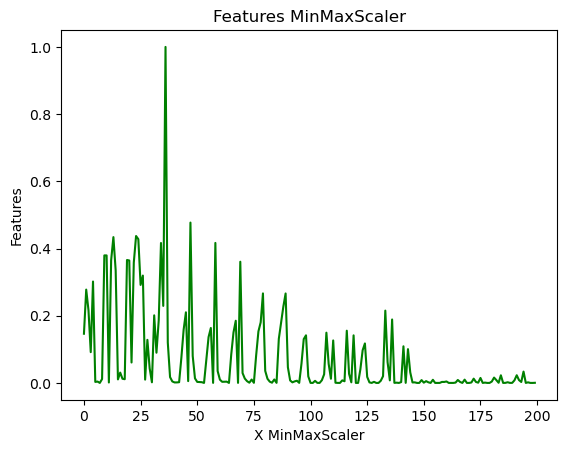

	 Original features 200
	 Selected features 27
	 Percentage of selected rules: 13.5 %
->Generate new tree based on list



KeyboardInterrupt



In [15]:
from iPRules.iPRules import iPRules

rules = iPRules(
                feature_names=dataset.feature_names,
                target_value_name = dataset.target_names,
                display_features = True,
                display_logs = True,
                chi_square_percent_point_function = 0.95,
                scale_feature_coefficient = 0.2,
                min_accuracy_coefficient = 0.9,
                min_number_class_per_node = 3
            )
# Fit model
rules.fit(encoded_train_pandas_dataset, ensemble.feature_importances_)

# Print Model

In [ ]:
print(rules)

# Predict

In [ ]:
# ENSEMBLE
y_pred_test_ensemble = ensemble.predict(X_test)

# RULES
y_pred_test_rules = rules.predict(X_test, sorting_method="target_accuracy")

In [ ]:
# CATEGORIZABLES
np_array_rules = np.array(y_pred_test_rules)
#not_filter_indices = np.where(np.logical_and(np_array_rules != 0, np_array_rules!=1))[0]
filter_indices = np.where(np_array_rules != None)[0]


np_filterred_y_test = np.array(y_test)[filter_indices]
np_filterred_y_pred_test_ensemble = np.array(y_pred_test_ensemble)[filter_indices]
np_filterred_y_pred_test_rules = np.array(y_pred_test_rules)[filter_indices]
# CHANGE FORMAT IN ORDER TO NOT HAVE PROBLEMS
np_filterred_y_pred_test_rules = np_filterred_y_pred_test_rules.astype('int64')


print(f'DATASET TEST: {len(y_test)}')
print(f'DATASET TEST categorizable: {len(np_filterred_y_test)}')
print('Cobertura:',str("{:.2f}".format(100*(len(np_filterred_y_pred_test_rules)/len(y_test))))+'%')

ensemble_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF accuracy:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
ensemble_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF F1-score:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
rules_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules Accuracy:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules F1-score:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.roc_auc_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules roc_auc_score:',str("{:.2f}".format(100*rules_accuracy))+'%')


# SHAP explainer

In [ ]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(ensemble)

# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names)


In [ ]:

shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names, plot_type="dot")